In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [228]:
# 한글 처리를 위한 코드
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
# 여가관련 지출 동향 및 의향 데이터
sp_tre1 = pd.read_csv('data/spending_trends/sp_tre1.csv')
sp_tre2 = pd.read_csv('data/spending_trends/sp_tre2.csv')
sp_tre3 = pd.read_csv('data/spending_trends/sp_tre3.csv')
sp_tre4 = pd.read_csv('data/spending_trends/sp_tre4.csv')
sp_tre5 = pd.read_csv('data/spending_trends/sp_tre5.csv')

# 여가관련 지출 동향 및 의향 데이터 합치기
spending_trend = pd.concat([sp_tre1, sp_tre2, sp_tre3, sp_tre4, sp_tre5])

# 컬럼명 바꾸기
spending_trend = spending_trend.rename( columns = {'RESPOND_ID':'id', 'EXAMIN_BEGIN_DE':'inspection_day' , 'SEXDSTN_FLAG_CD':'gender', 
                                  'AGRDE_FLAG_NM':'age', 'ANSWRR_OC_AREA_NM':'area', 'HSHLD_INCOME_DGREE_NM': 'income_degree', 
                                  'LSR_CT_EXPNDTR_TNDCY_VALUE':'now_leisure_spend','LSR_CT_EXPNDTR_INTEN_VALUE':'willingness_to_spending'})

In [68]:
# 하루 평균 여가문화 시간 및 사용 비중 데이터
avg_leisure1 = pd.read_csv('data/avg_leisure/avg_leisure1.csv')
avg_leisure2 = pd.read_csv('data/avg_leisure/avg_leisure2.csv')
avg_leisure3 = pd.read_csv('data/avg_leisure/avg_leisure3.csv')
avg_leisure4 = pd.read_csv('data/avg_leisure/avg_leisure4.csv')
avg_leisure5 = pd.read_csv('data/avg_leisure/avg_leisure5.csv')

# 하루 평균 여가문화 시간 및 사용 비중 데이터 합치기
avg_leisure = pd.concat([avg_leisure1, avg_leisure2, avg_leisure3, avg_leisure4, avg_leisure5])

# 컬럼명 바꾸기
avg_leisure = avg_leisure.rename( columns = {'RESPOND_ID':'id', 'EXAMIN_BEGIN_DE':'inspection_day' , 'SEXDSTN_FLAG_CD':'gender','AGRDE_FLAG_NM':'age',
                               'ANSWRR_OC_AREA_NM':'area', 'HSHLD_INCOME_DGREE_NM': 'income_degree', 'WORKDAY_DAY_AVRG_LSR_TIME_VALUE':'workday_leisure_avg', 'WKEND_DAY_AVRG_LSR_TIME_VALUE' : 'weekend_leisure_avg',
                               'ONE_WEEK_TOT_LSR_TIME_VALUE':'one_week_total_leisure', 'LSR_TIME_REST_RCRT_USE_RATE' : 'rest_rcrt_rate',
                               'LSR_TIME_HOBBY_USE_RATE': 'hobby_rate', 'LSR_TIME_SELF_IMPT_USE_RATE':'self_impt_rate',
                               'LSR_TIME_TWDPSN_RLTN_FLWSP_USE_RATE': 'human_relationship_rate', 'LSR_TIME_ETC_USE_RATE':'etc_rate'})

In [44]:
# Nan 값 확인
spending_trend.isna().sum()

id                         0
inspection_day             0
gender                     0
age                        0
area                       0
income_degree              0
now_leisure_spend          0
willingness_to_spending    0
dtype: int64

In [43]:
spending_trend['gender'].value_counts()

M    1323
F    1306
Name: gender, dtype: int64

In [42]:
spending_trend['age'].value_counts()

50대    598
40대    573
60대    509
30대    482
20대    467
Name: age, dtype: int64

In [32]:
spending_trend['area'].value_counts()

경기도        609
서울특별시      455
부산광역시      204
인천광역시      184
경상남도       165
대구광역시      139
경상북도       129
충청남도       115
충청북도       102
광주광역시       91
전라북도        90
대전광역시       80
강원도         76
전라남도        76
울산광역시       60
제주특별자치도     36
세종특별자치시     18
Name: area, dtype: int64

In [33]:
spending_trend['income_degree'].value_counts()

300이상500만원 미만    801
300만원 미만         685
500이상700만원 미만    514
700만원 이상         471
무응답              158
Name: income_degree, dtype: int64

In [36]:
spending_trend['now_leisure_spend'].value_counts()

비슷하다       1179
증가한 편이다    1015
감소한 편이다     291
크게 증가했다     107
크게 감소했다      37
Name: now_leisure_spend, dtype: int64

In [38]:
spending_trend['willingness_to_spending'].value_counts()

비슷할 것이다       1217
증가할 것이다       1068
감소할 것이다        238
크게 증가할 것이다      73
크게 감소할 것이다      33
Name: willingness_to_spending, dtype: int64

In [70]:
avg_leisure.isna().sum()

id                         0
inspection_day             0
gender                     0
age                        0
area                       0
income_degree              0
workday_leisure_avg        0
weekend_leisure_avg        0
one_week_total_leisure     0
rest_rcrt_rate             0
hobby_rate                 0
self_impt_rate             0
human_relationship_rate    0
etc_rate                   0
dtype: int64

In [79]:
# 평일, 주말, 1주 에 각 나이대별로 여가생활을 즐기는 총 시간의 평균
avg_leisure.groupby('age')[['workday_leisure_avg', 'weekend_leisure_avg', 'one_week_total_leisure']].mean()

,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure
age,,,
20대,3.423983,6.942184,31.004283
30대,2.622407,5.821577,24.755187
40대,2.561955,5.382199,23.574171
50대,2.730769,5.307692,24.269231
60대,3.214145,5.310413,26.691552


In [80]:
# 각 소득별 평일, 주말, 1주 에 각 나이대별로 여가생활을 즐기는 총 시간의 평균
avg_leisure.groupby('income_degree')[['workday_leisure_avg', 'weekend_leisure_avg', 'one_week_total_leisure']].mean()

,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure
income_degree,,,
300만원 미만,3.065693,5.769343,26.867153
300이상500만원 미만,2.756554,5.431960,24.646692
500이상700만원 미만,2.710117,5.745136,25.040856
700만원 이상,2.789809,5.747346,25.443737
무응답,3.702532,6.620253,31.753165


In [83]:
# 나이대별로 즐기는 여가 종류의 평균
avg_leisure.groupby('age')[['rest_rcrt_rate', 'hobby_rate', 'self_impt_rate', 'human_relationship_rate','etc_rate']].mean()

,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
age,,,,,
20대,48.220557,16.445396,10.475375,23.719486,1.139186
30대,48.037344,17.358921,11.136929,21.350622,2.116183
40대,41.699825,18.631763,12.996510,23.179756,3.492147
50대,37.473244,22.107023,13.163880,24.128763,3.127090
60대,32.190570,24.357564,14.477407,24.703340,4.271120


In [84]:
# 각 소득별 즐기는 여가 종류의 비율 평균 
avg_leisure.groupby('income_degree')[['rest_rcrt_rate', 'hobby_rate', 'self_impt_rate','human_relationship_rate','etc_rate']].mean()

,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
income_degree,,,,,
300만원 미만,41.992701,18.220438,12.286131,24.001460,3.499270
300이상500만원 미만,41.509363,20.355805,12.583021,22.766542,2.785268
500이상700만원 미만,39.293774,21.124514,12.533074,24.054475,2.994163
700만원 이상,38.292994,21.326964,13.664544,23.976645,2.738854
무응답,51.354430,16.784810,9.968354,21.006329,0.886076


In [ ]:
# spendint_trend 데이터와 avg_leisure 데이터가 겹치는 컬럼을 avg_leisure 데이터프레임에서 제거
avg_leisure = avg_leisure.drop(['inspection_day','gender','age','area','income_degree'], axis= 1)

In [233]:
# 데이터프레임 두개를 merge
leisure_data = pd.merge(spending_trend, avg_leisure, on = 'id', how= 'left')

In [265]:
leisure_data.loc[leisure_data['income_degree'] == '300만원 미만','income_degree'] = 200
leisure_data.loc[leisure_data['income_degree'] == '300이상500만원 미만','income_degree'] = 400
leisure_data.loc[leisure_data['income_degree'] == '500이상700만원 미만','income_degree'] = 600
leisure_data.loc[leisure_data['income_degree'] == '700만원 이상','income_degree'] = 700

In [377]:
leisure_data['income_degree'] = leisure_data['income_degree'].astype(float)

C:\Users\5-12\AppData\Local\Temp\ipykernel_9188\1367798738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leisure_data['income_degree'] = leisure_data['income_degree'].astype(float)


In [285]:
leisure_data = leisure_data[~leisure_data['income_degree'].isin(['무응답'])]

In [234]:
# 각 성별별로 즐기는 여가 생활의 비율 평균
leisure_data.groupby('gender')[['rest_rcrt_rate', 'hobby_rate', 'self_impt_rate','human_relationship_rate','etc_rate']].mean()

,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
gender,,,,,
F,41.640888,17.556662,13.641654,23.825421,3.335375
M,40.799698,22.231293,11.437642,23.081633,2.449735


In [378]:
leisure_data.describe()

,id,inspection_day,income_degree,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
count,2.471000e+03,2.471000e+03,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,5.332812e+07,2.022112e+07,443.342776,2.838932,5.650749,25.496155,40.569405,20.108863,12.696479,23.607446,3.017807
std,1.053224e+06,9.935305e+00,186.278261,2.071974,3.445915,14.726051,26.237269,19.979075,14.786748,19.234134,11.392433
min,1.000001e+06,2.022110e+07,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.333625e+07,2.022111e+07,200.000000,2.000000,3.000000,15.000000,20.000000,0.000000,0.000000,10.000000,0.000000
50%,5.334934e+07,2.022112e+07,400.000000,2.000000,5.000000,22.000000,40.000000,20.000000,10.000000,20.000000,0.000000
75%,5.336240e+07,2.022112e+07,600.000000,4.000000,8.000000,32.000000,60.000000,30.000000,20.000000,30.000000,0.000000
max,5.337752e+07,2.022113e+07,700.000000,18.000000,18.000000,126.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [379]:
leisure_data.corr()

,id,inspection_day,income_degree,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
id,1.000000,-0.000600,-0.028040,0.017201,0.026914,0.024697,-0.045907,0.020300,0.017776,0.024695,0.005360
inspection_day,-0.000600,1.000000,0.009270,-0.008610,-0.046826,-0.027972,0.009084,-0.000565,0.004771,0.000272,-0.026581
income_degree,-0.028040,0.009270,1.000000,-0.053758,0.004481,-0.035722,-0.053660,0.058226,0.025900,0.004988,-0.020567
workday_leisure_avg,0.017201,-0.008610,-0.053758,1.000000,0.434410,0.906811,0.049001,-0.014041,0.015146,-0.039592,-0.041042
weekend_leisure_avg,0.026914,-0.046826,0.004481,0.434410,1.000000,0.773613,0.041633,-0.044858,-0.027912,0.014271,-0.005080
one_week_total_leisure,0.024697,-0.027972,-0.035722,0.906811,0.773613,1.000000,0.053957,-0.030871,-0.002408,-0.021174,-0.031251
rest_rcrt_rate,-0.045907,0.009084,-0.053660,0.049001,0.041633,0.053957,1.000000,-0.510412,-0.388351,-0.427165,-0.182675
hobby_rate,0.020300,-0.000565,0.058226,-0.014041,-0.044858,-0.030871,-0.510412,1.000000,-0.063442,-0.219841,-0.124705
self_impt_rate,0.017776,0.004771,0.025900,0.015146,-0.027912,-0.002408,-0.388351,-0.063442,1.000000,-0.127178,-0.077581
human_relationship_rate,0.024695,0.000272,0.004988,-0.039592,0.014271,-0.021174,-0.427165,-0.219841,-0.127178,1.000000,-0.153938


In [380]:
leisure_data

,id,inspection_day,gender,age,area,income_degree,now_leisure_spend,willingness_to_spending,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
0,53322496,20221102,F,60대,서울특별시,400.0,비슷하다,비슷할 것이다,2,2,14,30,0,0,30,40
2,53322600,20221102,F,60대,서울특별시,600.0,비슷하다,비슷할 것이다,2,1,12,10,60,0,30,0
3,53322622,20221102,M,60대,서울특별시,200.0,감소한 편이다,감소할 것이다,2,0,10,40,15,10,35,0
4,53322914,20221102,F,50대,서울특별시,200.0,증가한 편이다,증가할 것이다,2,4,18,0,0,40,20,40
5,53322977,20221102,F,60대,서울특별시,400.0,비슷하다,비슷할 것이다,5,2,29,10,10,10,50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,53376697,20221130,F,20대,대전광역시,200.0,비슷하다,증가할 것이다,3,3,21,90,0,0,10,0
2625,53376719,20221130,M,30대,울산광역시,400.0,증가한 편이다,증가할 것이다,2,2,14,15,5,80,0,0
2626,53376796,20221130,M,50대,서울특별시,400.0,비슷하다,비슷할 것이다,2,8,26,0,0,50,50,0
2627,53377215,20221130,M,20대,인천광역시,600.0,증가한 편이다,비슷할 것이다,2,6,22,50,20,0,30,0


In [381]:
# 연령대별로 어느정도 버는지

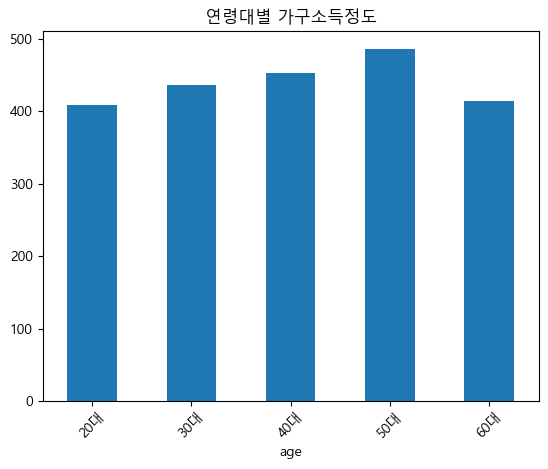

In [382]:
leisure_data.groupby('age')['income_degree'].mean().plot(kind= 'bar')
plt.xticks(rotation= 45)
plt.title('연령대별 가구소득정도')
plt.show()

In [383]:
leisure_data

,id,inspection_day,gender,age,area,income_degree,now_leisure_spend,willingness_to_spending,workday_leisure_avg,weekend_leisure_avg,one_week_total_leisure,rest_rcrt_rate,hobby_rate,self_impt_rate,human_relationship_rate,etc_rate
0,53322496,20221102,F,60대,서울특별시,400.0,비슷하다,비슷할 것이다,2,2,14,30,0,0,30,40
2,53322600,20221102,F,60대,서울특별시,600.0,비슷하다,비슷할 것이다,2,1,12,10,60,0,30,0
3,53322622,20221102,M,60대,서울특별시,200.0,감소한 편이다,감소할 것이다,2,0,10,40,15,10,35,0
4,53322914,20221102,F,50대,서울특별시,200.0,증가한 편이다,증가할 것이다,2,4,18,0,0,40,20,40
5,53322977,20221102,F,60대,서울특별시,400.0,비슷하다,비슷할 것이다,5,2,29,10,10,10,50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,53376697,20221130,F,20대,대전광역시,200.0,비슷하다,증가할 것이다,3,3,21,90,0,0,10,0
2625,53376719,20221130,M,30대,울산광역시,400.0,증가한 편이다,증가할 것이다,2,2,14,15,5,80,0,0
2626,53376796,20221130,M,50대,서울특별시,400.0,비슷하다,비슷할 것이다,2,8,26,0,0,50,50,0
2627,53377215,20221130,M,20대,인천광역시,600.0,증가한 편이다,비슷할 것이다,2,6,22,50,20,0,30,0


In [384]:
# 상관관계 구하기
leisure_data[['income_degree','workday_leisure_avg','weekend_leisure_avg']].corr()

,income_degree,workday_leisure_avg,weekend_leisure_avg
income_degree,1.000000,-0.053758,0.004481
workday_leisure_avg,-0.053758,1.000000,0.434410
weekend_leisure_avg,0.004481,0.434410,1.000000


In [231]:
# 연령대별로 현재 여가활동에 어느정도 쓰고있는지

In [323]:
# 20대를 예시로

In [359]:
data_20 = leisure_data[leisure_data['age'] == '20대']['now_leisure_spend'].value_counts(ascending= True)

In [360]:
data_20

크게 감소했다      9
크게 증가했다     32
감소한 편이다     35
비슷하다       127
증가한 편이다    159
Name: now_leisure_spend, dtype: int64

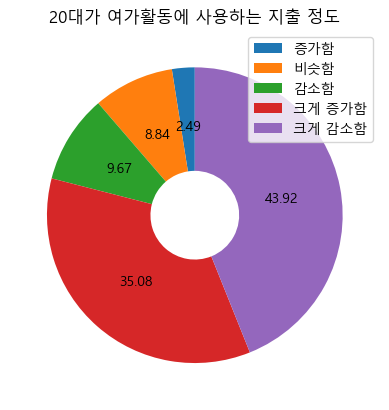

In [361]:
labels = ['증가함','비슷함','감소함','크게 증가함','크게 감소함']

plt.pie(data_20, startangle= 90, autopct= '%.2f',wedgeprops= {'width' : 0.7})
plt.title('20대가 여가활동에 사용하는 지출 정도')
plt.legend(labels, loc='upper right')
plt.show()

In [312]:
leisure_data.groupby('age')['now_leisure_spend'].value_counts().to_frame()

now_leisure_spend
age now_leisure_spend                   
20대 증가한 편이다                          159
    비슷하다                             127
    감소한 편이다                           35
    크게 증가했다                           32
    크게 감소했다                            9
30대 비슷하다                             193
    증가한 편이다                          187
    감소한 편이다                           57
    크게 증가했다                           20
    크게 감소했다                            7
40대 비슷하다                             263
    증가한 편이다                          216
    감소한 편이다                           48
    크게 증가했다                           27
    크게 감소했다                            9
50대 비슷하다                             267
    증가한 편이다                          235
    감소한 편이다                           73
    크게 감소했다                            5
    크게 증가했다                            5
60대 비슷하다                             260
    증가한 편이다                          166
    감소한 편이다                           62
    크게 증가했다                            6
    크게 감소했다                            3

In [ ]:
# 성별로 현재 여가활동에 어느정도 쓰고있는지

In [362]:
data_M = leisure_data[leisure_data['gender'] == 'M']['now_leisure_spend'].value_counts(ascending= True)

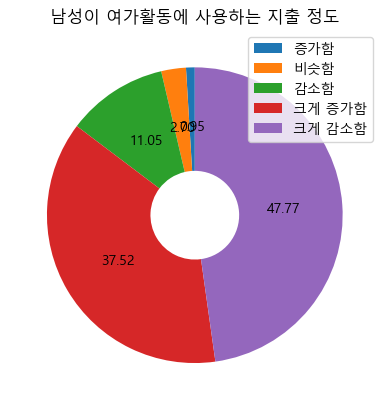

In [364]:
labels = ['증가함','비슷함','감소함','크게 증가함','크게 감소함']


plt.pie(data_M, startangle= 90, autopct= '%.2f',wedgeprops= {'width' : 0.7})
plt.title('남성이 여가활동에 사용하는 지출 정도')
plt.legend(labels, loc='upper right')
plt.show()

In [319]:
leisure_data.groupby('gender')['now_leisure_spend'].value_counts().to_frame()

now_leisure_spend
gender now_leisure_spend                   
F      비슷하다                             509
       증가한 편이다                          491
       감소한 편이다                          136
       크게 증가했다                           56
       크게 감소했다                           21
M      비슷하다                             601
       증가한 편이다                          472
       감소한 편이다                          139
       크게 증가했다                           34
       크게 감소했다                           12

In [ ]:
# 앞으로 여가활동에 어느정도 쓸것 같은지

In [ ]:
# 그리고 앞으로 여가활동에 얼만큼 지출할 예정인지,

In [ ]:
# 연령별, 성별별로 어떤 여가활동이 가장 많았는지